КЛАСТЕРИЗАЦИЯ

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import preprocessing
import category_encoders as ce

from sklearn import model_selection
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn import mixture

In [2]:
data= pd.read_csv('data/snsdata.csv')
data.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [3]:
data = data.drop(['gradyear', 'gender', 'age', 'friends'], axis=1)
data.shape

(30000, 36)

In [4]:
scaler = preprocessing.StandardScaler()
scaler.fit(data)
X_norm = scaler.transform(data)
X_norm[0][0]

-0.3322172643985876

In [5]:
k_means = KMeans(n_clusters=9, random_state=42)
k_means.fit(X_norm)
k_means.inertia_

857169.103399769

In [6]:
clust_pred = k_means.predict(X_norm)
pd.Series(clust_pred).value_counts()

0    19659
3     4490
7     2098
1      930
4      851
6      762
8      716
5      493
2        1
dtype: int64

In [7]:
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

In [8]:
inertias = []
for clust_num in range(3, 10):
    inertias.append(get_inertia(cluster_num=clust_num, X=X_norm))

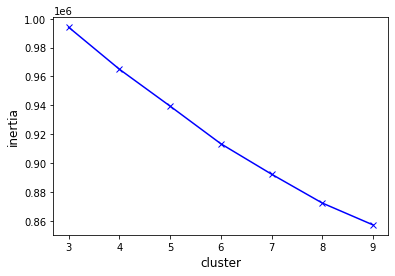

In [9]:
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
plt.plot([i for i in range(3, 10)], inertias, 'xb-')

In [10]:
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = metrics.silhouette_score(X, k_means.labels_)
    return silhouette

silhouette = []
for clust_num in range(3, 10):
    silhouette.append(get_silhouette(clust_num, X_norm))


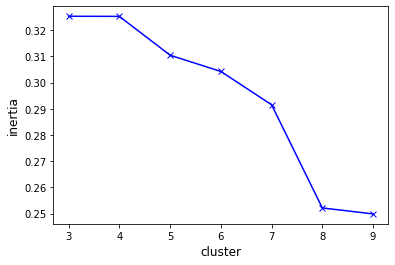

In [11]:
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
plt.plot([i for i in range(3, 10)], silhouette, 'xb-')

In [12]:
k_means = KMeans(n_clusters=3, random_state=42)
k_means.fit(X_norm)

KMeans(n_clusters=3, random_state=42)

In [13]:
data.loc[:, 'label'] = k_means.labels_
data.label.value_counts()

2    22932
0     5938
1     1130
Name: label, dtype: int64

In [14]:
for label, group in data.groupby('label'):
    means = group.iloc[:,:-1].mean().sort_values(ascending=False)
    print(means.head(5))

music       1.055406
dance       0.998484
shopping    0.939205
god         0.886325
cute        0.798417
dtype: float64
hair      3.223894
sex       2.430088
music     2.262832
kissed    1.575221
die       1.211504
dtype: float64
music    0.580455
god      0.330019
dance    0.250785
band     0.243328
hair     0.203122
dtype: float64


In [15]:
em = mixture.GaussianMixture(n_components=3, random_state=42)
predictions = em.fit_predict(X_norm)
np.unique(predictions, return_counts=True)

(array([0, 1, 2], dtype=int64), array([23426,  6573,     1], dtype=int64))

In [16]:
data.loc[:, 'label_em'] = predictions

In [17]:
data[data['label_em']==2].T[0:-1]

,14187
basketball,0
football,2
soccer,0
softball,0
volleyball,0
swimming,1
cheerleading,0
baseball,0
tennis,0
sports,0


In [19]:
bank_data = pd.read_csv('data/CC_GENERAL.csv')
bank_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [24]:
bank_data.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [22]:
fill_dict = {
    'CREDIT_LIMIT':bank_data['CREDIT_LIMIT'].mean(),
    'MINIMUM_PAYMENTS':bank_data['MINIMUM_PAYMENTS'].mean()
}

bank_data.fillna(fill_dict, inplace=True)

In [23]:
bank_data['MINIMUM_PAYMENTS'].mean()

864.2065423050827

In [48]:
X = bank_data.drop(['CUST_ID'], axis=1)
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X[0][0]

-0.7319893664465486

In [49]:
X_norm = pd.DataFrame(
    data=X,
    columns=bank_data.drop(['CUST_ID'], axis=1).columns
)
X_norm.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


In [50]:
def get_silhouette(n_clust, X):
    model = KMeans(n_clusters=n_clust)
    model.fit(X)
    silhouette = metrics.silhouette_score(X, model.labels_)
    return silhouette

silhouette = []
for clust_num in range(2, 10):
    silhouette.append(get_silhouette(clust_num, X_norm))

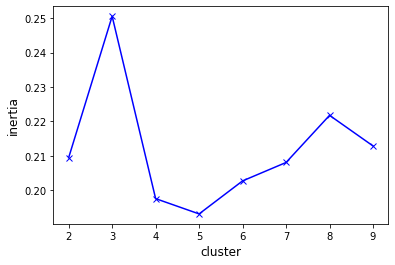

In [51]:
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouette, '-xb')

In [52]:
k_means = KMeans(n_clusters=3)
k_means.fit(X_norm)

#X_norm.loc[:, 'label'] = k_means.labels_

KMeans(n_clusters=3)

In [33]:
#X_norm['label'].value_counts()

0    6119
2    1596
1    1235
Name: label, dtype: int64

In [53]:
from sklearn.cluster import DBSCAN

In [54]:
db = DBSCAN()
db.fit(X_norm)

clusters = db.labels_
len(set(clusters)) - (1 if -1 in clusters else 0)

38

In [55]:
siliuette_list_dbscan = []
 
for eps in np.arange(0.1,3,0.2):
    for min_sample in range(1,20,4):
        dbscan = DBSCAN(eps=eps, min_samples=min_sample)
        dbscan.fit(X_norm)
        sil_score = metrics.silhouette_score(X_norm, dbscan.labels_, metric='euclidean')
        siliuette_list_dbscan.append((eps, min_sample, sil_score, len(set(dbscan.labels_))) )
df_dbscan = pd.DataFrame(siliuette_list_dbscan, columns=['eps', 'min_samples', 'sil_score', 'number_of_clusters'])
df_dbscan.sort_values(by = 'sil_score')

,eps,min_samples,sil_score,number_of_clusters
11,0.5,5,-0.443701,39
16,0.7,5,-0.438837,29
6,0.3,5,-0.424475,42
7,0.3,9,-0.404209,15
30,1.3,1,-0.399305,1536
...,...,...,...,...
74,2.9,17,0.591924,2
66,2.7,5,0.592182,2
73,2.9,13,0.595399,2
72,2.9,9,0.603811,2


In [56]:
from sklearn.cluster import AgglomerativeClustering

In [58]:
siliuette_list_ag = []

for n_clust in range(3, 10):
    ag = AgglomerativeClustering(n_clusters=n_clust)
    ag.fit(X_norm)
    sil_score = metrics.silhouette_score(X_norm, ag.labels_)
    siliuette_list_ag.append((n_clust, sil_score,len(set(ag.labels_)) ) )
        
df_hierarchical = pd.DataFrame(siliuette_list_ag, columns=['cluster', 'sil_score','number_of_clusters'])
 
 
df_hierarchical.sort_values(by = 'sil_score')